In [1]:
server = 'obi'
logBoth = True

if server == 'obi':
    dataDir = '/data/willett_data/competitionData/'
    if logBoth:
        dataSave = '/data/willett_data/ptDecoder_ctc_both'
    else:
        dataSave = '/data/willett_data/ptDecoder_ctc'
        
elif server == 'leia':
    dataDir = '/home3/skaasyap/willett/competitionData/'
    if logBoth:
        dataSave = '/home3/skaasyap/willett/data_log_both'
    else:
        dataSave = '/home3/skaasyap/willett/data'

print(dataDir, dataSave)

/data/willett_data/competitionData/ /data/willett_data/ptDecoder_ctc_both


In [2]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home3/ebrahim2/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
import pickle

if server == 'leia':
    
    with open('/home3/skaasyap/willett/data', 'rb') as f:
        data = pickle.load(f)
    #with open('/home3/skaasyap/willett/data_held_out_days', 'rb') as f:
    #    data_held_out = pickle.load(f)
    with open('/home3/skaasyap/willett/data_log_both', 'rb') as f:
        data_logged = pickle.load(f)
    with open('/home3/skaasyap/willett/data_log_both_held_out_days', 'rb') as f:
        data_logged_held_out = pickle.load(f)
        
    print(data['train'][0]['sentenceDat'][0].std(), data['train'][0]['sentenceDat'][0].mean())
    print(data_logged['train'][0]['sentenceDat'][0].std(), data_logged['train'][0]['sentenceDat'][0].mean())

if server == 'obi':
    with open('/data/willett_data/ptDecoder_ctc', 'rb') as f:
        data = pickle.load(f)
    with open('/data/willett_data/ptDecoder_ctc_held_out_days', 'rb') as f:
        data_held_out = pickle.load(f)
    with open('/data/willett_data/ptDecoder_ctc_both', 'rb') as f:
        data_logged = pickle.load(f)
    with open('/data/willett_data/ptDecoder_ctc_both_held_out_days', 'rb') as f:
        data_logged_held_out = pickle.load(f)
        
#i = 10
#print(data['train'][i]['sentenceDat'][i].std(), data['train'][i]['sentenceDat'][i].mean())
#print(data_logged['train'][i]['sentenceDat'][i].std(), data_logged['train'][i]['sentenceDat'][i].mean())
#print(data_held_out['train'][i]['sentenceDat'][i].std(), data['train'][i]['sentenceDat'][i].mean())
#print(data_logged_held_out['train'][i]['sentenceDat'][i].std(), data_logged['train'][i]['sentenceDat'][i].mean())



In [ ]:
sessionNames = ['t12.2022.04.28',  't12.2022.05.26',  't12.2022.06.21',  't12.2022.07.21',  't12.2022.08.13',
't12.2022.05.05',  't12.2022.06.02',  't12.2022.06.23',  't12.2022.07.27',  't12.2022.08.18',
't12.2022.05.17',  't12.2022.06.07',  't12.2022.06.28',  't12.2022.07.29',  't12.2022.08.23',
't12.2022.05.19',  't12.2022.06.14',  't12.2022.07.05',  't12.2022.08.02',  't12.2022.08.25',
't12.2022.05.24',  't12.2022.06.16',  't12.2022.07.14',  't12.2022.08.11']
sessionNames.sort()

In [ ]:
import re 
from g2p_en import G2p
import numpy as np

g2p = G2p()
PHONE_DEF = [
    'AA', 'AE', 'AH', 'AO', 'AW',
    'AY', 'B',  'CH', 'D', 'DH',
    'EH', 'ER', 'EY', 'F', 'G',
    'HH', 'IH', 'IY', 'JH', 'K',
    'L', 'M', 'N', 'NG', 'OW',
    'OY', 'P', 'R', 'S', 'SH',
    'T', 'TH', 'UH', 'UW', 'V',
    'W', 'Y', 'Z', 'ZH'
]
PHONE_DEF_SIL = PHONE_DEF + ['SIL']

def phoneToId(p):
    return PHONE_DEF_SIL.index(p)

In [ ]:
def reorder_electrode_idxs(feats):
    
    '''
    In the original array, first 128 indices of feats are txcrossings, 
    second 128 features are spikeband power.
    Here what we do is rearrange feats so that:
        0-64: tx for inferior
        64-128: spikepow for inferior
        128-194: tx for superior
        194-256: spikepow for superior
    '''
    
    area_6v_superior = np.array([
    [62,  51,  43,  35,  94,  87,  79,  78],
    [60,  53,  41,  33,  95,  86,  77,  76],
    [63,  54,  47,  44,  93,  84,  75,  74],
    [58,  55,  48,  40,  92,  85,  73,  72],
    [59,  45,  46,  38,  91,  82,  71,  70],
    [61,  49,  42,  36,  90,  83,  69,  68],
    [56,  52,  39,  34,  89,  81,  67,  66],
    [57,  50,  37,  32,  88,  80,  65,  64]
    ])
    
    superior_combined_array = np.empty(area_6v_superior.size * 2, dtype=area_6v_superior.dtype)  
    
    # first 64 features are tx, second 64 are spikeband power
    superior_combined_array[:64] = area_6v_superior.ravel()
    superior_combined_array[64:] = area_6v_superior.ravel() + 128   

    area_6v_inferior = np.array([
        [125, 126, 112, 103,  31,  28,  11,  8],
        [123, 124, 110, 102,  29,  26,   9,  5],
        [121, 122, 109, 101,  27,  19,  18,  4],
        [119, 120, 108, 100,  25,  15,  12,  6],
        [117, 118, 107,  99,  23,  13,  10,  3],
        [115, 116, 106,  97,  21,  20,   7,  2],
        [113, 114, 105,  98,  17,  24,  14,  0],
        [127, 111, 104,  96,  30,  22,  16,  1]
    ])
    
    inferior_combined_array = np.empty(area_6v_inferior.size * 2, dtype=area_6v_inferior.dtype)  
    inferior_combined_array[:64] = area_6v_inferior.ravel()
    inferior_combined_array[64:] = area_6v_inferior.ravel() + 128   
    
    feats_reshaped = np.zeros_like(feats)
    
    feats_reshaped[:, 0:128] = feats[:, inferior_combined_array.ravel()]
    feats_reshaped[:, 128:] = feats[:, superior_combined_array.ravel()]
    
    return feats_reshaped
    

In [ ]:
import scipy

def loadFeaturesAndNormalize(sessionPath, logBoth):
    
    dat = scipy.io.loadmat(sessionPath)

    input_features = []
    transcriptions = []
    frame_lens = []
    block_means = []
    block_stds = []
    n_trials = dat['sentenceText'].shape[0]

    #collect area 6v tx1 and spikePow features
    for i in range(n_trials):    
        #get time series of TX and spike power for this trial
        #first 128 columns = area 6v only
        if logBoth:
            tx_crossings = np.log1p(dat['tx1'][0, i][:, 0:128])
            log_pow = np.log(dat['spikePow'][0,i][:,0:128])
            features = np.concatenate([tx_crossings, log_pow], axis=1)
        else:
            features = np.concatenate([dat['tx1'][0,i][:,0:128], dat['spikePow'][0,i][:,0:128]], axis=1)

        sentence_len = features.shape[0]
        sentence = dat['sentenceText'][i].strip()

        input_features.append(features)
        transcriptions.append(sentence)
        frame_lens.append(sentence_len)

    #block-wise feature normalization
    blockNums = np.squeeze(dat['blockIdx'])
    blockList = np.unique(blockNums)
    blocks = []
    for b in range(len(blockList)):
        sentIdx = np.argwhere(blockNums==blockList[b])
        sentIdx = sentIdx[:,0].astype(np.int32)
        blocks.append(sentIdx)

    for b in range(len(blocks)):
        feats = reorder_electrode_idxs(np.concatenate(input_features[blocks[b][0]:(blocks[b][-1]+1)], axis=0))
        # feats = np.concatenate(input_features[blocks[b][0]:(blocks[b][-1]+1)], axis=0)

        feats_mean = np.mean(feats, axis=0, keepdims=True)
        feats_std = np.std(feats, axis=0, keepdims=True)
        for i in blocks[b]:
            input_features[i] = reorder_electrode_idxs(input_features[i])
            input_features[i] = (input_features[i] - feats_mean) / (feats_std + 1e-8)

    #convert to tfRecord file
    session_data = {
        'inputFeatures': input_features,
        'transcriptions': transcriptions,
        'frameLens': frame_lens
    }

    return session_data


In [ ]:
import os

def getDataset(fileName, logBoth):
    
    session_data = loadFeaturesAndNormalize(fileName, logBoth)
        
    allDat = []
    trueSentences = []
    seqElements = []
    
    for x in range(len(session_data['inputFeatures'])):
        allDat.append(session_data['inputFeatures'][x])
        trueSentences.append(session_data['transcriptions'][x])
        
        thisTranscription = str(session_data['transcriptions'][x]).strip()
        thisTranscription = re.sub(r'[^a-zA-Z\- \']', '', thisTranscription)
        thisTranscription = thisTranscription.replace('--', '').lower()
        addInterWordSymbol = True

        phonemes = []
        for p in g2p(thisTranscription):
            if addInterWordSymbol and p==' ':
                phonemes.append('SIL')
            p = re.sub(r'[0-9]', '', p)  # Remove stress
            if re.match(r'[A-Z]+', p):  # Only keep phonemes
                phonemes.append(p)

        #add one SIL symbol at the end so there's one at the end of each word
        if addInterWordSymbol:
            phonemes.append('SIL')

        seqLen = len(phonemes)
        maxSeqLen = 500
        seqClassIDs = np.zeros([maxSeqLen]).astype(np.int32)
        seqClassIDs[0:seqLen] = [phoneToId(p) + 1 for p in phonemes]
        seqElements.append(seqClassIDs)

    newDataset = {}
    newDataset['sentenceDat'] = allDat
    newDataset['transcriptions'] = trueSentences
    newDataset['phonemes'] = seqElements
    
    timeSeriesLens = []
    phoneLens = []
    for x in range(len(newDataset['sentenceDat'])):
        timeSeriesLens.append(newDataset['sentenceDat'][x].shape[0])
        
        zeroIdx = np.argwhere(newDataset['phonemes'][x]==0)
        phoneLens.append(zeroIdx[0,0])
    
    newDataset['timeSeriesLens'] = np.array(timeSeriesLens)
    newDataset['phoneLens'] = np.array(phoneLens)
    newDataset['phonePerTime'] = newDataset['phoneLens'].astype(np.float32) / newDataset['timeSeriesLens'].astype(np.float32)
    return newDataset

In [13]:
trainDatasets = []
testDatasets = []
competitionDatasets = []


for dayIdx in range(len(sessionNames)):
    trainDataset = getDataset(dataDir + '/train/' + sessionNames[dayIdx] + '.mat', logBoth)
    testDataset = getDataset(dataDir + '/test/' + sessionNames[dayIdx] + '.mat', logBoth)

    trainDatasets.append(trainDataset)
    testDatasets.append(testDataset)

    if os.path.exists(dataDir + '/competitionHoldOut/' + sessionNames[dayIdx] + '.mat'):
        dataset = getDataset(dataDir + '/competitionHoldOut/' + sessionNames[dayIdx] + '.mat', logBoth)
        competitionDatasets.append(dataset)

In [16]:
import pickle

allDatasets = {}
allDatasets['train'] = trainDatasets
allDatasets['test'] = testDatasets
allDatasets['competition'] = competitionDatasets

with open(dataSave, 'wb') as handle:
    pickle.dump(allDatasets, handle)

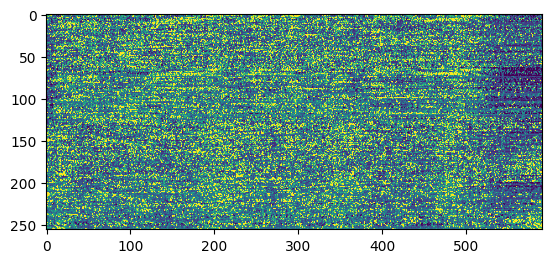

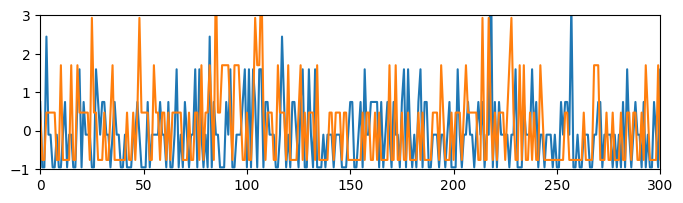

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainDatasets[0]['sentenceDat'][10].T, clim=[-1,1])
plt.show()

plt.figure(figsize=(8,2))
plt.plot(trainDatasets[0]['sentenceDat'][10][:,0])
plt.plot(trainDatasets[0]['sentenceDat'][10][:,128])
plt.xlim([0,300])
plt.ylim([-1,3])
plt.show()

In [ ]:
def combine_dicts(dict1, dict2):
    
    combined_dict = {}
    for key in dict1.keys():
        if key in ['sentenceDat', 'transcriptions', 'phonemes']: 
            combined_dict[key] = dict1[key] + dict2[key]
        else:
            combined_dict[key] = np.concatenate([dict1[key], dict2[key]])
        
    return combined_dict

# Held out days testing

In [ ]:
competitionDays = []
for dayIdx in range(len(sessionNames)):
    if os.path.exists(dataDir + '/competitionHoldOut/' + sessionNames[dayIdx] + '.mat'):
        competitionDays.append(dayIdx)
print(competitionDays)

for cd in competitionDays:
    print(sessionNames[cd])

[4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20]
t12.2022.05.24
t12.2022.05.26
t12.2022.06.02
t12.2022.06.07
t12.2022.06.14
t12.2022.06.16
t12.2022.06.21
t12.2022.06.28
t12.2022.07.05
t12.2022.07.14
t12.2022.07.21
t12.2022.07.27
t12.2022.08.02
t12.2022.08.11
t12.2022.08.13


In [ ]:
sessionNames

['t12.2022.04.28',
 't12.2022.05.05',
 't12.2022.05.17',
 't12.2022.05.19',
 't12.2022.05.24',
 't12.2022.05.26',
 't12.2022.06.02',
 't12.2022.06.07',
 't12.2022.06.14',
 't12.2022.06.16',
 't12.2022.06.21',
 't12.2022.06.23',
 't12.2022.06.28',
 't12.2022.07.05',
 't12.2022.07.14',
 't12.2022.07.21',
 't12.2022.07.27',
 't12.2022.07.29',
 't12.2022.08.02',
 't12.2022.08.11',
 't12.2022.08.13',
 't12.2022.08.18',
 't12.2022.08.23',
 't12.2022.08.25']

In [13]:
trainDatasets = []
testDatasets = []
competitionDatasets = []

held_out_run_set = 1

if held_out_run_set == 0:

    evaluation_days = ['07.21', '07.27', '07.29', '08.02', '08.11', '08.13'] # added an extra comp day
    loop_until = -3
    
elif held_out_run_set == 1:
    
    evaluation_days = ['06.16', '06.21', '06.28', '07.05', '07.14']
    loop_until = -9
    
elif held_out_run_set == 2:
    
    evaluation_days = ['05.24', '05.26', '06.02', '06.07', '06.14']
    loop_until = -15


# skipping the last 3 days because they are not historical data. 
for dayIdx in range(len(sessionNames[:loop_until])):
    
    if sessionNames[dayIdx][-5:] in evaluation_days:
        
        print(f"Placing {sessionNames[dayIdx]} in test/comp")
        
        # put both train and test data for held-out days into "test (really val)".
        testDataset1 = getDataset(dataDir + '/train/' + sessionNames[dayIdx] + '.mat', logBoth)
        testDataset2 = getDataset(dataDir + '/test/' + sessionNames[dayIdx] + '.mat', logBoth)
        testDataset = combine_dicts(testDataset1, testDataset2)
        testDatasets.append(testDataset)
        
        # only testing on these held-out days now. 
        if os.path.exists(dataDir + '/competitionHoldOut/' + sessionNames[dayIdx] + '.mat'):
            dataset = getDataset(dataDir + '/competitionHoldOut/' + sessionNames[dayIdx] + '.mat', logBoth)
            competitionDatasets.append(dataset)
            
    else:
        
        # put both train and test data for non held-out days into train
        trainDataset1 = getDataset(dataDir + '/train/' + sessionNames[dayIdx] + '.mat', logBoth)
        trainDataset2 = getDataset(dataDir + '/test/' + sessionNames[dayIdx] + '.mat', logBoth)
        trainDataset = combine_dicts(trainDataset1, trainDataset2)
        trainDatasets.append(trainDataset)

Placing t12.2022.05.24 in test/comp
Placing t12.2022.05.26 in test/comp
Placing t12.2022.06.02 in test/comp
Placing t12.2022.06.07 in test/comp
Placing t12.2022.06.14 in test/comp


In [47]:
print("max day held out 0 ", 24 - 3 - 6 - 1)
print("max day held out 1 ", 24 -9 - 5 - 1)
print("max day held out 2 ", 24 - 15 - 5 - 1)


max day held out 0  14
max day held out 1  9
max day held out 2  3


In [14]:
import pickle
allDatasets = {}
allDatasets['train'] = trainDatasets
allDatasets['test'] = testDatasets
allDatasets['competition'] = competitionDatasets

print(held_out_run_set)
if held_out_run_set > 0:
    dataSave_held_out_days = f"{dataSave}_held_out_days_{held_out_run_set}"
else:
    dataSave_held_out_days = f"{dataSave}_held_out_days"
    
with open(dataSave_held_out_days, 'wb') as handle:
    pickle.dump(allDatasets, handle)

2


In [20]:
import numpy as np
evaluation_days = ['07.21', '07.27', '08.02', 
                 '08.11', '08.13', '07.29', '07.14', '07.05', '06.28', '06.23', '06.21', '06.16', 
                 '06.14', '06.07', '06.02', '05.26', '05.24', '05.19', '05.17', '05.05', '04.28']

sessionNames_days = np.array([x[-5:] for x in sessionNames])
# skipping the last 3 days because they are not historical data. 
for eval_day in evaluation_days:
    
    print(np.argwhere(eval_day==sessionNames_days)[0])
        

21
[15]
[16]
[18]
[19]
[20]
[17]
[14]
[13]
[12]
[11]
[10]
[9]
[8]
[7]
[6]
[5]
[4]
[3]
[2]
[1]
[0]
